In [5]:
import pandas as pd
movies = pd.read_csv('source/movies.csv')
ratings= pd.read_csv('source/ratings.csv')

In [6]:
movies['genres'] = movies['genres'].str.split('|')
movies.head()
#ratings.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [7]:
def getAllGenres():
    #get all categories
    genres=[]
    for index, row in movies.iterrows():
        eidh=row['genres']
        for genre in eidh:
            if not genre in genres:
                genres.append(genre)
    return genres

In [8]:
allGenres=getAllGenres()
allGenres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'Documentary',
 'IMAX',
 'War',
 'Musical',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [9]:
def getMovieGenres(movieId):
    index=movies.index[movies['movieId'] == movieId].tolist()[0]#could just write movieId-1
    return movies['genres'][index]

In [10]:
def createUserRatingsDict(ratings):
    userRatings={}
    for index, row in ratings.iterrows():
        userId,movieId=row['userId'],row['movieId']
        rating=row['rating']
        genres=getMovieGenres(movieId)

        if not userId in userRatings: 
            #initiate the index of the user with all ratings=0
            genreDict={}
            for genre in allGenres:
                genreDict[genre]={'value':0 ,'count':0 }

            userRatings[userId]=genreDict

        for genre in genres:
            userRatings[userId][genre]['value']+=rating
            userRatings[userId][genre]['count']+=1
    return userRatings
        

In [11]:
def setAverageRating(df): 
    userGenreRatings=df.copy(deep=True)#changes will not affect the initial parmaeter
    for index, row in userGenreRatings.iterrows():
        for genre in allGenres:                
            if row[genre]['count']==0:
              pass
            else:
                userGenreRatings[genre][index]=row[genre]['value']/row[genre]['count']
    
    return userGenreRatings

In [12]:
def fillMissingDataPreProcessing(df,missing_data_completion='neutral'):
    userGenreRatings=df.copy(deep=True)#changes will not affect the initial parmaeter
    for index, row in userGenreRatings.iterrows():
        for genre in allGenres:  
            
            rated_of_column=[ i for i in  userGenreRatings[genre]  if type(i)!=dict ] 
            missing_value={
               'neutral': 2.5,
                'out_of_range':-1,
                'zero':0,
               'column_mean':sum(rated_of_column) /len(rated_of_column)  
            }
            
            if type( row[genre] )==dict:
                userGenreRatings[genre][index]=missing_value[missing_data_completion]
    
    return userGenreRatings
    
    

In [13]:
userRatings=createUserRatingsDict(ratings)
userGenreRatingsDict=pd.DataFrame(userRatings).T

In [14]:
userGenreRatingsWithMissing=setAverageRating(userGenreRatingsDict)
userGenreRatingsWithMissing.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1.0,"{'value': 0, 'count': 0}",2.8,2.16667,2,2.5,2,2.5,"{'value': 0, 'count': 0}",2.57143,2.125,"{'value': 0, 'count': 0}",3,"{'value': 0, 'count': 0}",3,"{'value': 0, 'count': 0}",3.5,2.4,2.83333,2,3
2.0,"{'value': 0, 'count': 0}",3.31579,3.75,3.66667,3.5,3.09375,3.66667,"{'value': 0, 'count': 0}",3.61538,3.4,"{'value': 0, 'count': 0}",3.5,4,3.75,4,3.59091,3.8,3.33333,3.8,5
3.0,"{'value': 0, 'count': 0}",3.46875,3.3,2.875,2.7,3.61111,3.7,3.66667,3.92,3,"{'value': 0, 'count': 0}",3.375,2.875,2.5,3.75,3.65,3.14286,3.54545,4.16667,4
4.0,"{'value': 0, 'count': 0}",4.27419,4.33871,4.70833,4.63415,4.32955,4.15789,4,4.46429,4.56757,5,3.94444,5,4.83333,4.09091,4.5,4.25581,4.02273,4.75,3
5.0,"{'value': 0, 'count': 0}",4,3.825,3.9,3.89286,3.98182,3.45,3.66667,3.80769,3.75,"{'value': 0, 'count': 0}",3.875,4,4.25,3.33333,4.08108,4,3.625,4,"{'value': 0, 'count': 0}"


In [15]:
userGenreRatingsMissingFilled=fillMissingDataPreProcessing(userGenreRatingsWithMissing,missing_data_completion='column_mean')
userGenreRatingsMissingFilled.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1.0,2.5,2.8,2.16667,2,2.5,2,2.5,2.5,2.57143,2.125,2.5,3,2.5,3,2.5,3.5,2.4,2.83333,2,3
2.0,2.5,3.31579,3.75,3.66667,3.5,3.09375,3.66667,2.5,3.61538,3.4,2.5,3.5,4,3.75,4,3.59091,3.8,3.33333,3.8,5
3.0,2.5,3.46875,3.3,2.875,2.7,3.61111,3.7,3.66667,3.92,3,2.5,3.375,2.875,2.5,3.75,3.65,3.14286,3.54545,4.16667,4
4.0,2.5,4.27419,4.33871,4.70833,4.63415,4.32955,4.15789,4,4.46429,4.56757,5,3.94444,5,4.83333,4.09091,4.5,4.25581,4.02273,4.75,3
5.0,2.5,4,3.825,3.9,3.89286,3.98182,3.45,3.66667,3.80769,3.75,2.5,3.875,4,4.25,3.33333,4.08108,4,3.625,4,2.5


In [20]:
del userGenreRatingsMissingFilled['(no genres listed)']
userGenreRatingsMissingFilled.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1.0,2.8,2.16667,2,2.5,2,2.5,2.5,2.57143,2.125,2.5,3,2.5,3,2.5,3.5,2.4,2.83333,2,3
2.0,3.31579,3.75,3.66667,3.5,3.09375,3.66667,2.5,3.61538,3.4,2.5,3.5,4,3.75,4,3.59091,3.8,3.33333,3.8,5
3.0,3.46875,3.3,2.875,2.7,3.61111,3.7,3.66667,3.92,3,2.5,3.375,2.875,2.5,3.75,3.65,3.14286,3.54545,4.16667,4
4.0,4.27419,4.33871,4.70833,4.63415,4.32955,4.15789,4,4.46429,4.56757,5,3.94444,5,4.83333,4.09091,4.5,4.25581,4.02273,4.75,3
5.0,4,3.825,3.9,3.89286,3.98182,3.45,3.66667,3.80769,3.75,2.5,3.875,4,4.25,3.33333,4.08108,4,3.625,4,2.5


In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,StratifiedShuffleSplit
import random
import numpy as np

In [22]:
def get_method_score(dfIn,method,noOfsplits=5,noOfClusters=5):
    df=fillMissingDataPreProcessing(dfIn,missing_data_completion=method)
    
    test_data_percentage=0.01
    method_score=0
    for i in range(noOfsplits):
        #print("==========================",i,"==========================")
        test_indexes=random.sample( range(len(df)), int(test_data_percentage*len(df)) )  
        train_indexes = [i for i in range(len(df)) if i not in test_indexes]

        train = df.iloc[train_indexes]
        test =  df.iloc[test_indexes]

        kmeans = KMeans(n_clusters=noOfClusters).fit(train)

        predictions=kmeans.predict(test)
        centroids = kmeans.cluster_centers_

        split_score=0
        for j,predicted_centroid in enumerate (predictions):
            #print("           ==========================",j,"==========================")
            predicted=centroids[predicted_centroid]
            real=test.iloc[j]                    

            error=np.abs(np.subtract(real,predicted))
            score=np.sum(error)
            #print("       ",score)
            split_score+=score
            #print("        ",predictions)
        average_split_score=split_score/len(predictions)
        #print('Average Score:',average_split_score)
        method_score+=average_split_score

    average_method_score=method_score/noOfsplits
    return average_method_score

In [24]:
methods=['neutral','out_of_range','zero','column_mean']
for method in methods:
    score=get_method_score(userGenreRatingsWithMissing,method=method,noOfsplits=5,noOfClusters=15)
    print(method,"-->",score)

neutral --> 6.935075264234081
out_of_range --> 11.575462738422852
zero --> 10.615216380238767
column_mean --> 6.324597076988099


In [70]:
def getClusterScore(df,noOfsplits=5,noOfClusters=5):
    test_data_percentage=0.01
    cluster_score=0
    inertia=0
    for i in range(noOfsplits):
        #print("==========================",i,"==========================")
        test_indexes=random.sample( range(len(df)), int(test_data_percentage*len(df)) )  
        train_indexes = [i for i in range(len(df)) if i not in test_indexes]

        train = df.iloc[train_indexes]
        test =  df.iloc[test_indexes]

        kmeans = KMeans(n_clusters=noOfClusters).fit(train)
        inertia+=kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

        predictions=kmeans.predict(test)
        centroids = kmeans.cluster_centers_

        split_score=0
        for j,predicted_centroid in enumerate (predictions):
            predicted=centroids[predicted_centroid]
            real=test.iloc[j]                    

            error=np.square(np.subtract(real,predicted))
            score=np.sqrt( np.sum(error) )
            
            split_score+=score

        average_split_score=split_score/len(predictions)

        cluster_score+=average_split_score

    average_cluster_score=cluster_score/noOfsplits
    average_inertia=inertia/noOfsplits
    return average_cluster_score,average_inertia

In [35]:
df=fillMissingDataPreProcessing(userGenreRatingsWithMissing,missing_data_completion='column_mean')
getClusterScore(df,noOfsplits=5,noOfClusters=5)

5.780880821396953

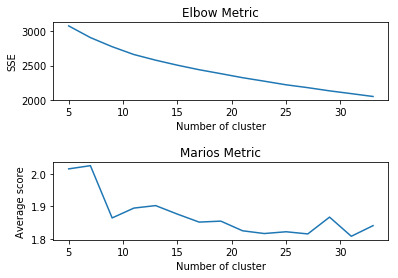

In [85]:
sse = {}
scores={}
for i in range(5,35,2):
    score,inertia=getClusterScore(df,noOfsplits=50,noOfClusters=i)
    
    sse[i]=inertia
    scores[i]=score

import matplotlib.pyplot as plt


plt.figure()
plt.subplot(2,1,1)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Elbow Metric")

plt.subplot(2,1,2)
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Average score")
plt.title("Marios Metric")

plt.subplots_adjust(hspace = 0.8 )
plt.show()  